# **Breast Cancer Prediction**
### Libraries to Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix

%matplotlib inline

### load and Read CSV

In [2]:
# Citation Request:
#    This breast cancer databases was obtained from the University of Wisconsin
#    Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
#    when using this database, then please include this information in your
#    acknowledgements.  Also, please cite one or more of:

#    1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
#       programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

#    2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
#       pattern separation for medical diagnosis applied to breast cytology", 
#       Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
#       December 1990, pp 9193-9196.

#    3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
#       via linear programming: Theory and application to medical diagnosis", 
#       in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
#       Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

#    4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
#       discrimination of two linearly inseparable sets", Optimization Methods
#       and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

# URL to load data
source = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Adding names to CSV columns
colNames = ['id', 'clumpThickness', 'uniformCellSize', 'uniformCellShape',
       'marginalAdhesion', 'singleEpithelialSize', 'bareNuclei',
       'blandChromatin', 'normalNucleoli', 'mitoses', 'class']
       
bCancerDF = pd.read_csv(source, names=colNames)
bCancerDF.head()

,id,clumpThickness,uniformCellSize,uniformCellShape,marginalAdhesion,singleEpithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# checking number of rows & columns
bCancerDF.shape

(699, 11)

### Preprocessing

In [4]:
# droping index column
bCancerDF.drop(['id'],axis=1,inplace = True)
bCancerDF.columns

Index(['clumpThickness', 'uniformCellSize', 'uniformCellShape',
       'marginalAdhesion', 'singleEpithelialSize', 'bareNuclei',
       'blandChromatin', 'normalNucleoli', 'mitoses', 'class'],
      dtype='object')

### Handling Missing Values

In [5]:
# Dataframe Information
bCancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   clumpThickness        699 non-null    int64 
 1   uniformCellSize       699 non-null    int64 
 2   uniformCellShape      699 non-null    int64 
 3   marginalAdhesion      699 non-null    int64 
 4   singleEpithelialSize  699 non-null    int64 
 5   bareNuclei            699 non-null    object
 6   blandChromatin        699 non-null    int64 
 7   normalNucleoli        699 non-null    int64 
 8   mitoses               699 non-null    int64 
 9   class                 699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
#Diagnosis class:
# 2 is for Benign
# 4 is for Malignant

# Total number of Benign and Maglinant cases from the dataset
bCancerDF['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
# counting number of rows for bareNuclei from 1 to 10
bCancerDF['bareNuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bareNuclei, dtype: int64

In [9]:
# finding unknowns
bCancerDF[bCancerDF['bareNuclei'] == '?']

,clumpThickness,uniformCellSize,uniformCellShape,marginalAdhesion,singleEpithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [10]:
# getting sum of values for each feature (column) with unknown values
bCancerDF[bCancerDF['bareNuclei'] == '?'].sum()

clumpThickness                        54
uniformCellSize                       39
uniformCellShape                      46
marginalAdhesion                      29
singleEpithelialSize                  39
bareNuclei              ????????????????
blandChromatin                        50
normalNucleoli                        44
mitoses                               16
class                                 36
dtype: object

In [11]:
# replace nan with '?'
bCancerDF.replace('?',np.nan,inplace=True)

# checking data at index 23 for the confirmation of replacement
bCancerDF.loc[23,:]

clumpThickness            8
uniformCellSize           4
uniformCellShape          5
marginalAdhesion          1
singleEpithelialSize      2
bareNuclei              NaN
blandChromatin            7
normalNucleoli            3
mitoses                   1
class                     4
Name: 23, dtype: object

In [12]:
# Number of records with Null values
bCancerDF.isna().sum()

clumpThickness           0
uniformCellSize          0
uniformCellShape         0
marginalAdhesion         0
singleEpithelialSize     0
bareNuclei              16
blandChromatin           0
normalNucleoli           0
mitoses                  0
class                    0
dtype: int64

In [13]:
# filling null values with 'ffill'
# that propagates last valid observation forward
bCancerDF.fillna(method='ffill', inplace=True)

#now you can see that there isn't any null value
bCancerDF.isna().sum()

clumpThickness          0
uniformCellSize         0
uniformCellShape        0
marginalAdhesion        0
singleEpithelialSize    0
bareNuclei              0
blandChromatin          0
normalNucleoli          0
mitoses                 0
class                   0
dtype: int64

In [14]:
bCancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   clumpThickness        699 non-null    int64 
 1   uniformCellSize       699 non-null    int64 
 2   uniformCellShape      699 non-null    int64 
 3   marginalAdhesion      699 non-null    int64 
 4   singleEpithelialSize  699 non-null    int64 
 5   bareNuclei            699 non-null    object
 6   blandChromatin        699 non-null    int64 
 7   normalNucleoli        699 non-null    int64 
 8   mitoses               699 non-null    int64 
 9   class                 699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
#changing bareNuclei dataype to int64
bCancerDF['bareNuclei'] = bCancerDF['bareNuclei'].astype('int64')

### Exploratory Data Analysis (EDA)

In [20]:
# dataframe information
bCancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   clumpThickness        699 non-null    int64
 1   uniformCellSize       699 non-null    int64
 2   uniformCellShape      699 non-null    int64
 3   marginalAdhesion      699 non-null    int64
 4   singleEpithelialSize  699 non-null    int64
 5   bareNuclei            699 non-null    int64
 6   blandChromatin        699 non-null    int64
 7   normalNucleoli        699 non-null    int64
 8   mitoses               699 non-null    int64
 9   class                 699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [21]:
# describing statistical values for numeric data
bCancerDF.describe()

,clumpThickness,uniformCellSize,uniformCellShape,marginalAdhesion,singleEpithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


##  Data Analysis

### 1. Bivariate

#### Histogram plot with KDE

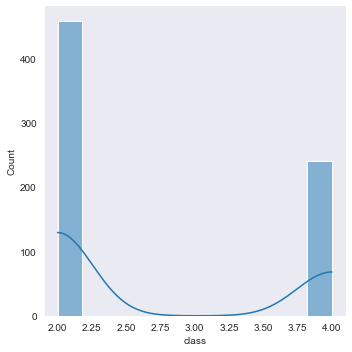

In [38]:
sns.displot(bCancerDF['class'],kde=True)

#### scatter plot with hue

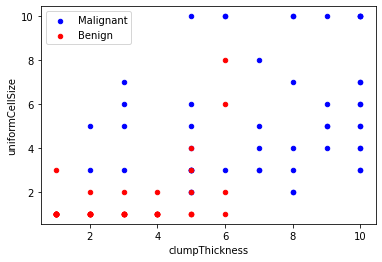

In [23]:
# showing scatter plot for clumpThickness and unifromCellSize between the two classes
ax = bCancerDF[bCancerDF['class'] == 4][0:50].plot(kind='scatter', x='clumpThickness', y='uniformCellSize', color='Blue', label='Malignant')
bCancerDF[bCancerDF['class'] == 2][0:50].plot(kind='scatter', x='clumpThickness', y='uniformCellSize', color='Red', label='Benign', ax=ax)
plt.show()

### 2. Multivariate

#### single histogram for all variables

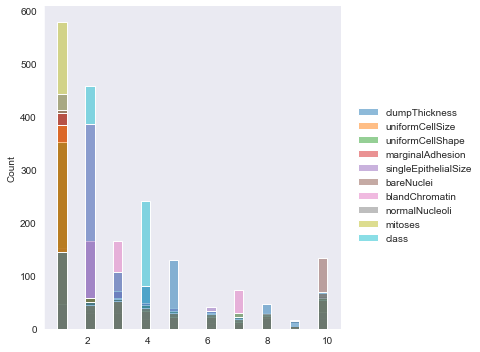

In [40]:
sns.displot(data=bCancerDF)

#### Histograms for each attribute

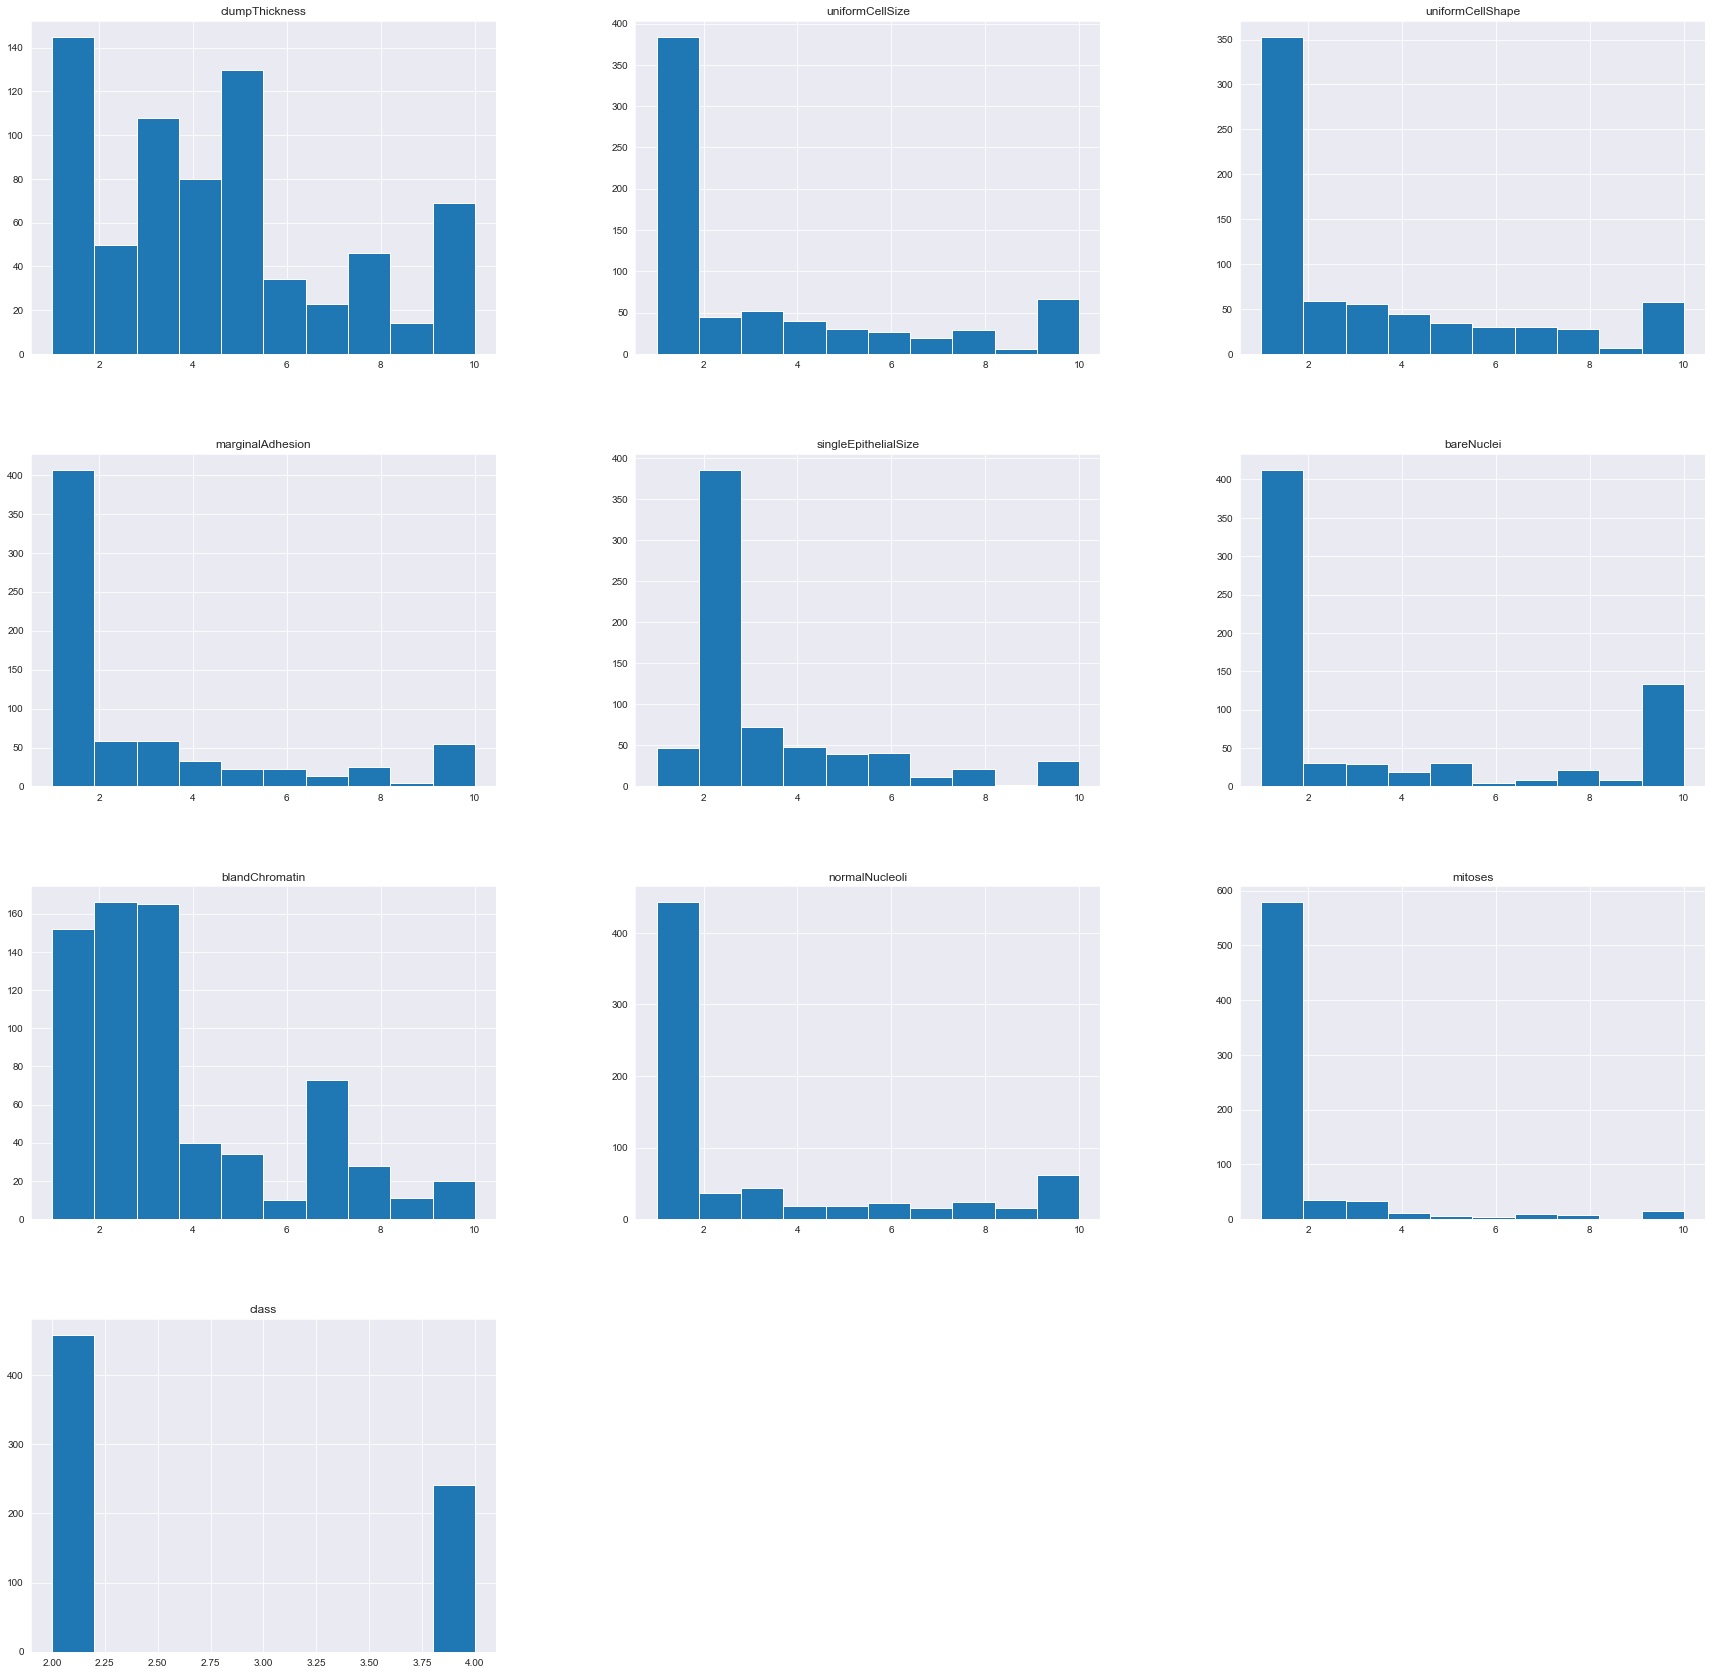

In [41]:
sns.set_style('dark')
bCancerDF.hist(figsize=(30,30))
plt.show()

#### Scatter plot matrix

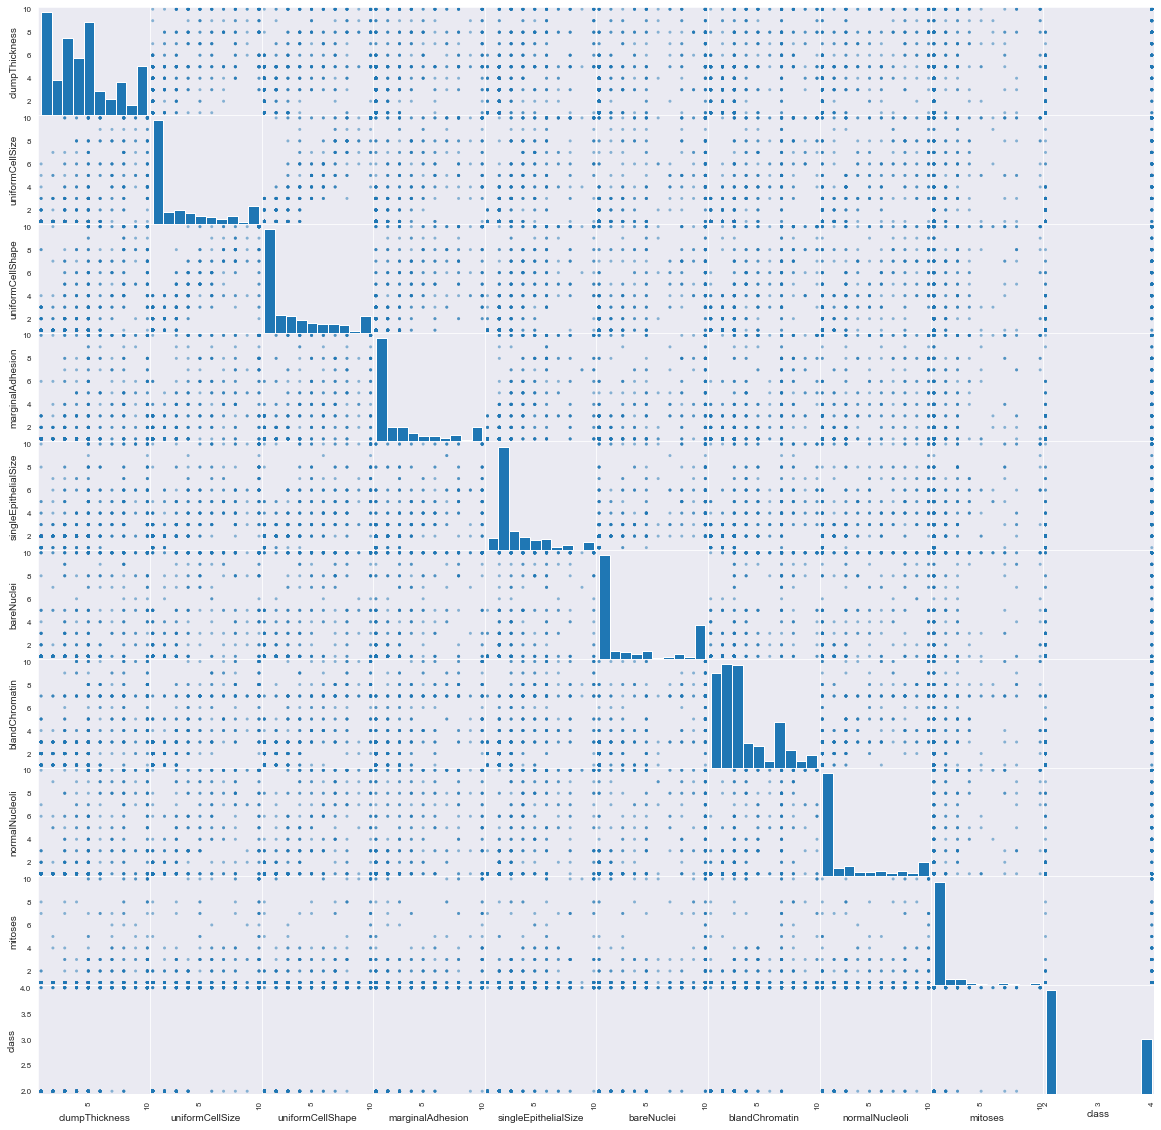

In [42]:
scatter_matrix(bCancerDF, figsize = (20,20))
plt.show()

#### Box plot (vertial orientation)

<AxesSubplot:>

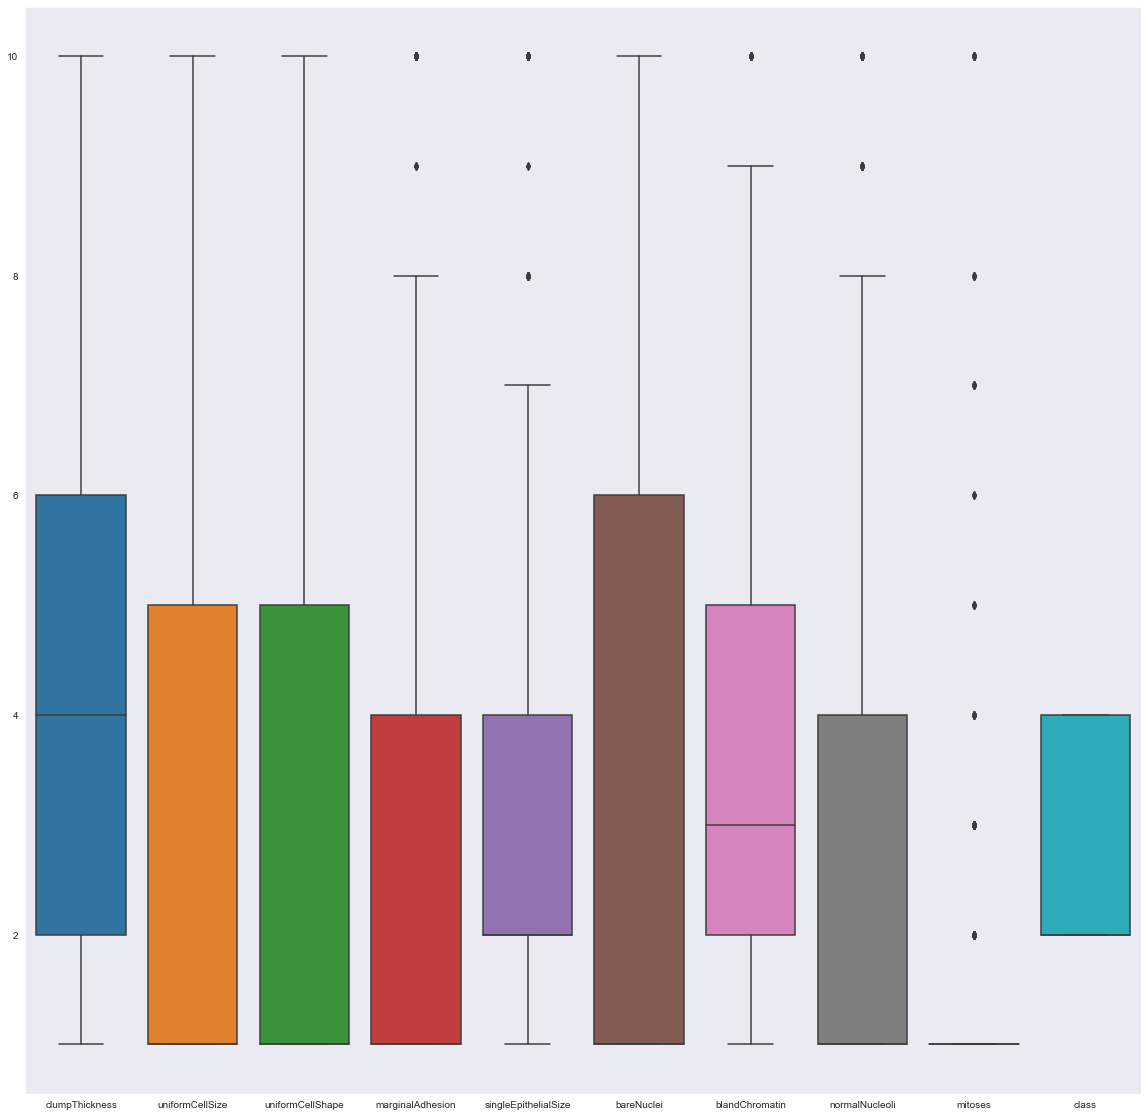

In [44]:
plt.figure(figsize=(20,20))
sns.boxplot(data=bCancerDF)

#### Box plot with horizontal orientation

<AxesSubplot:>

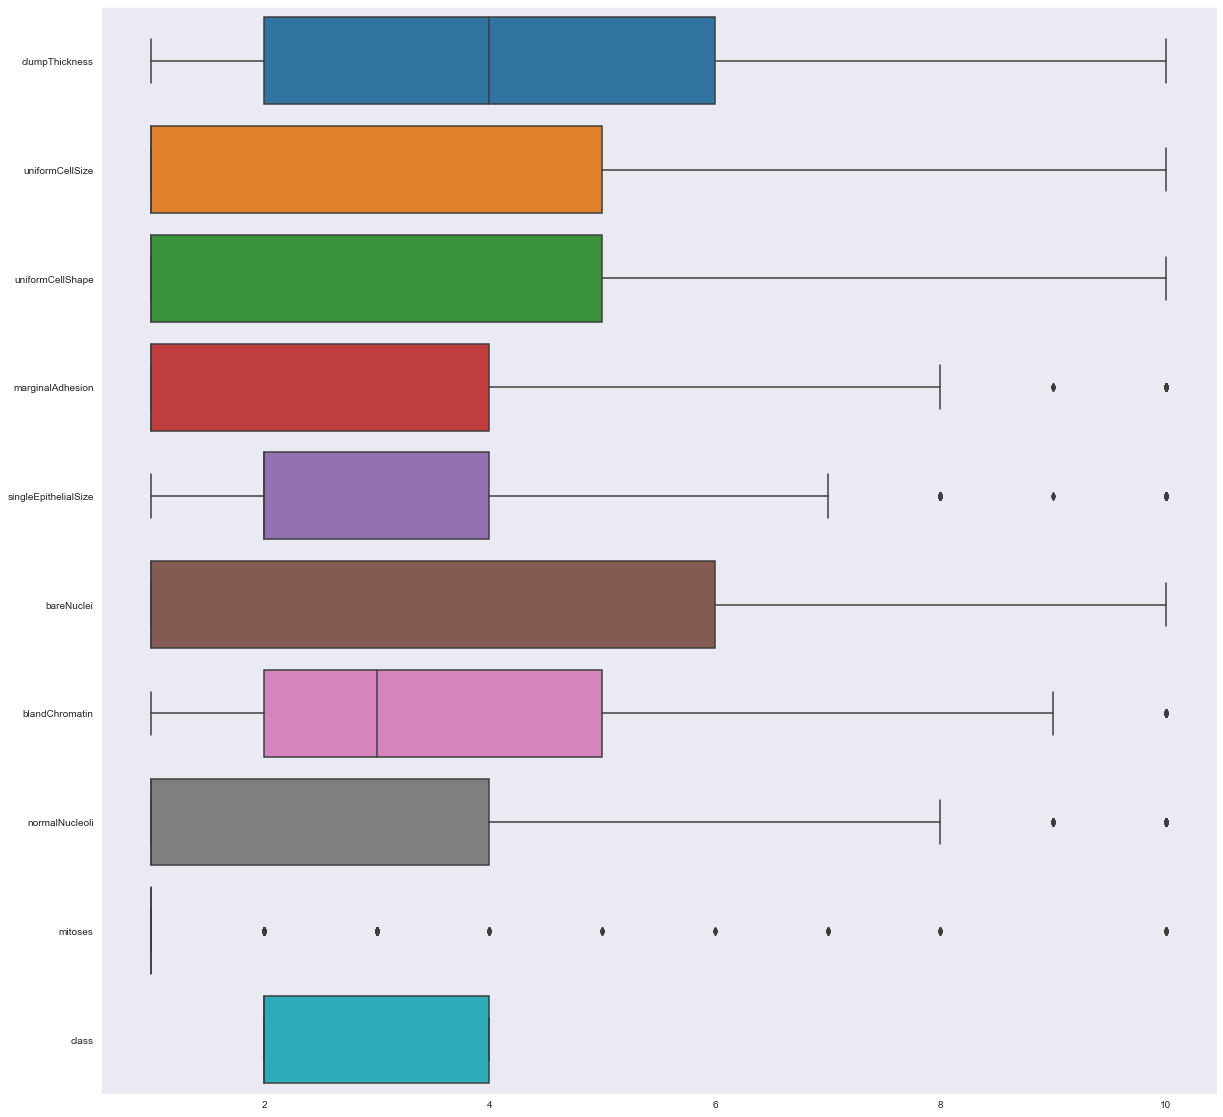

In [45]:
plt.figure(figsize=(20,20))
sns.boxplot(data=bCancerDF, orient='h')

## Feature selection

### Correlation chart

In [47]:
coR = bCancerDF.corr()
coR

,clumpThickness,uniformCellSize,uniformCellShape,marginalAdhesion,singleEpithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,class
clumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
uniformCellSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
uniformCellShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
marginalAdhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
singleEpithelialSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
bareNuclei,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
blandChromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
normalNucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


### Heatmap

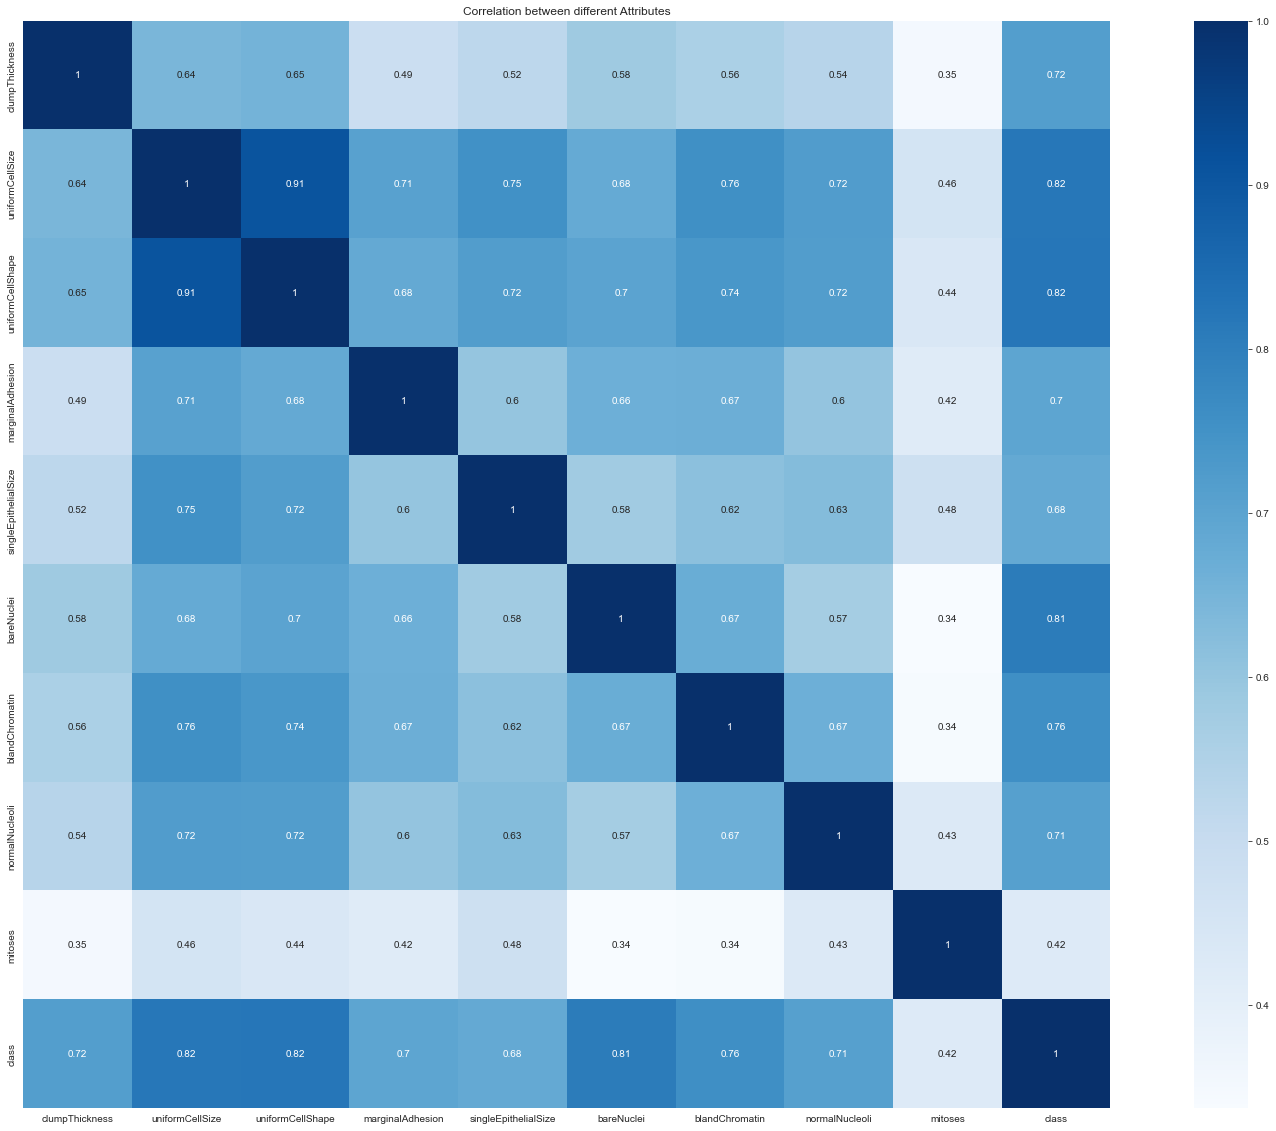

In [49]:
plt.figure(figsize=(30,20))
sns.heatmap(coR,vmax=1, square = True, annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different Attributes')
plt.show()

### Pairplot

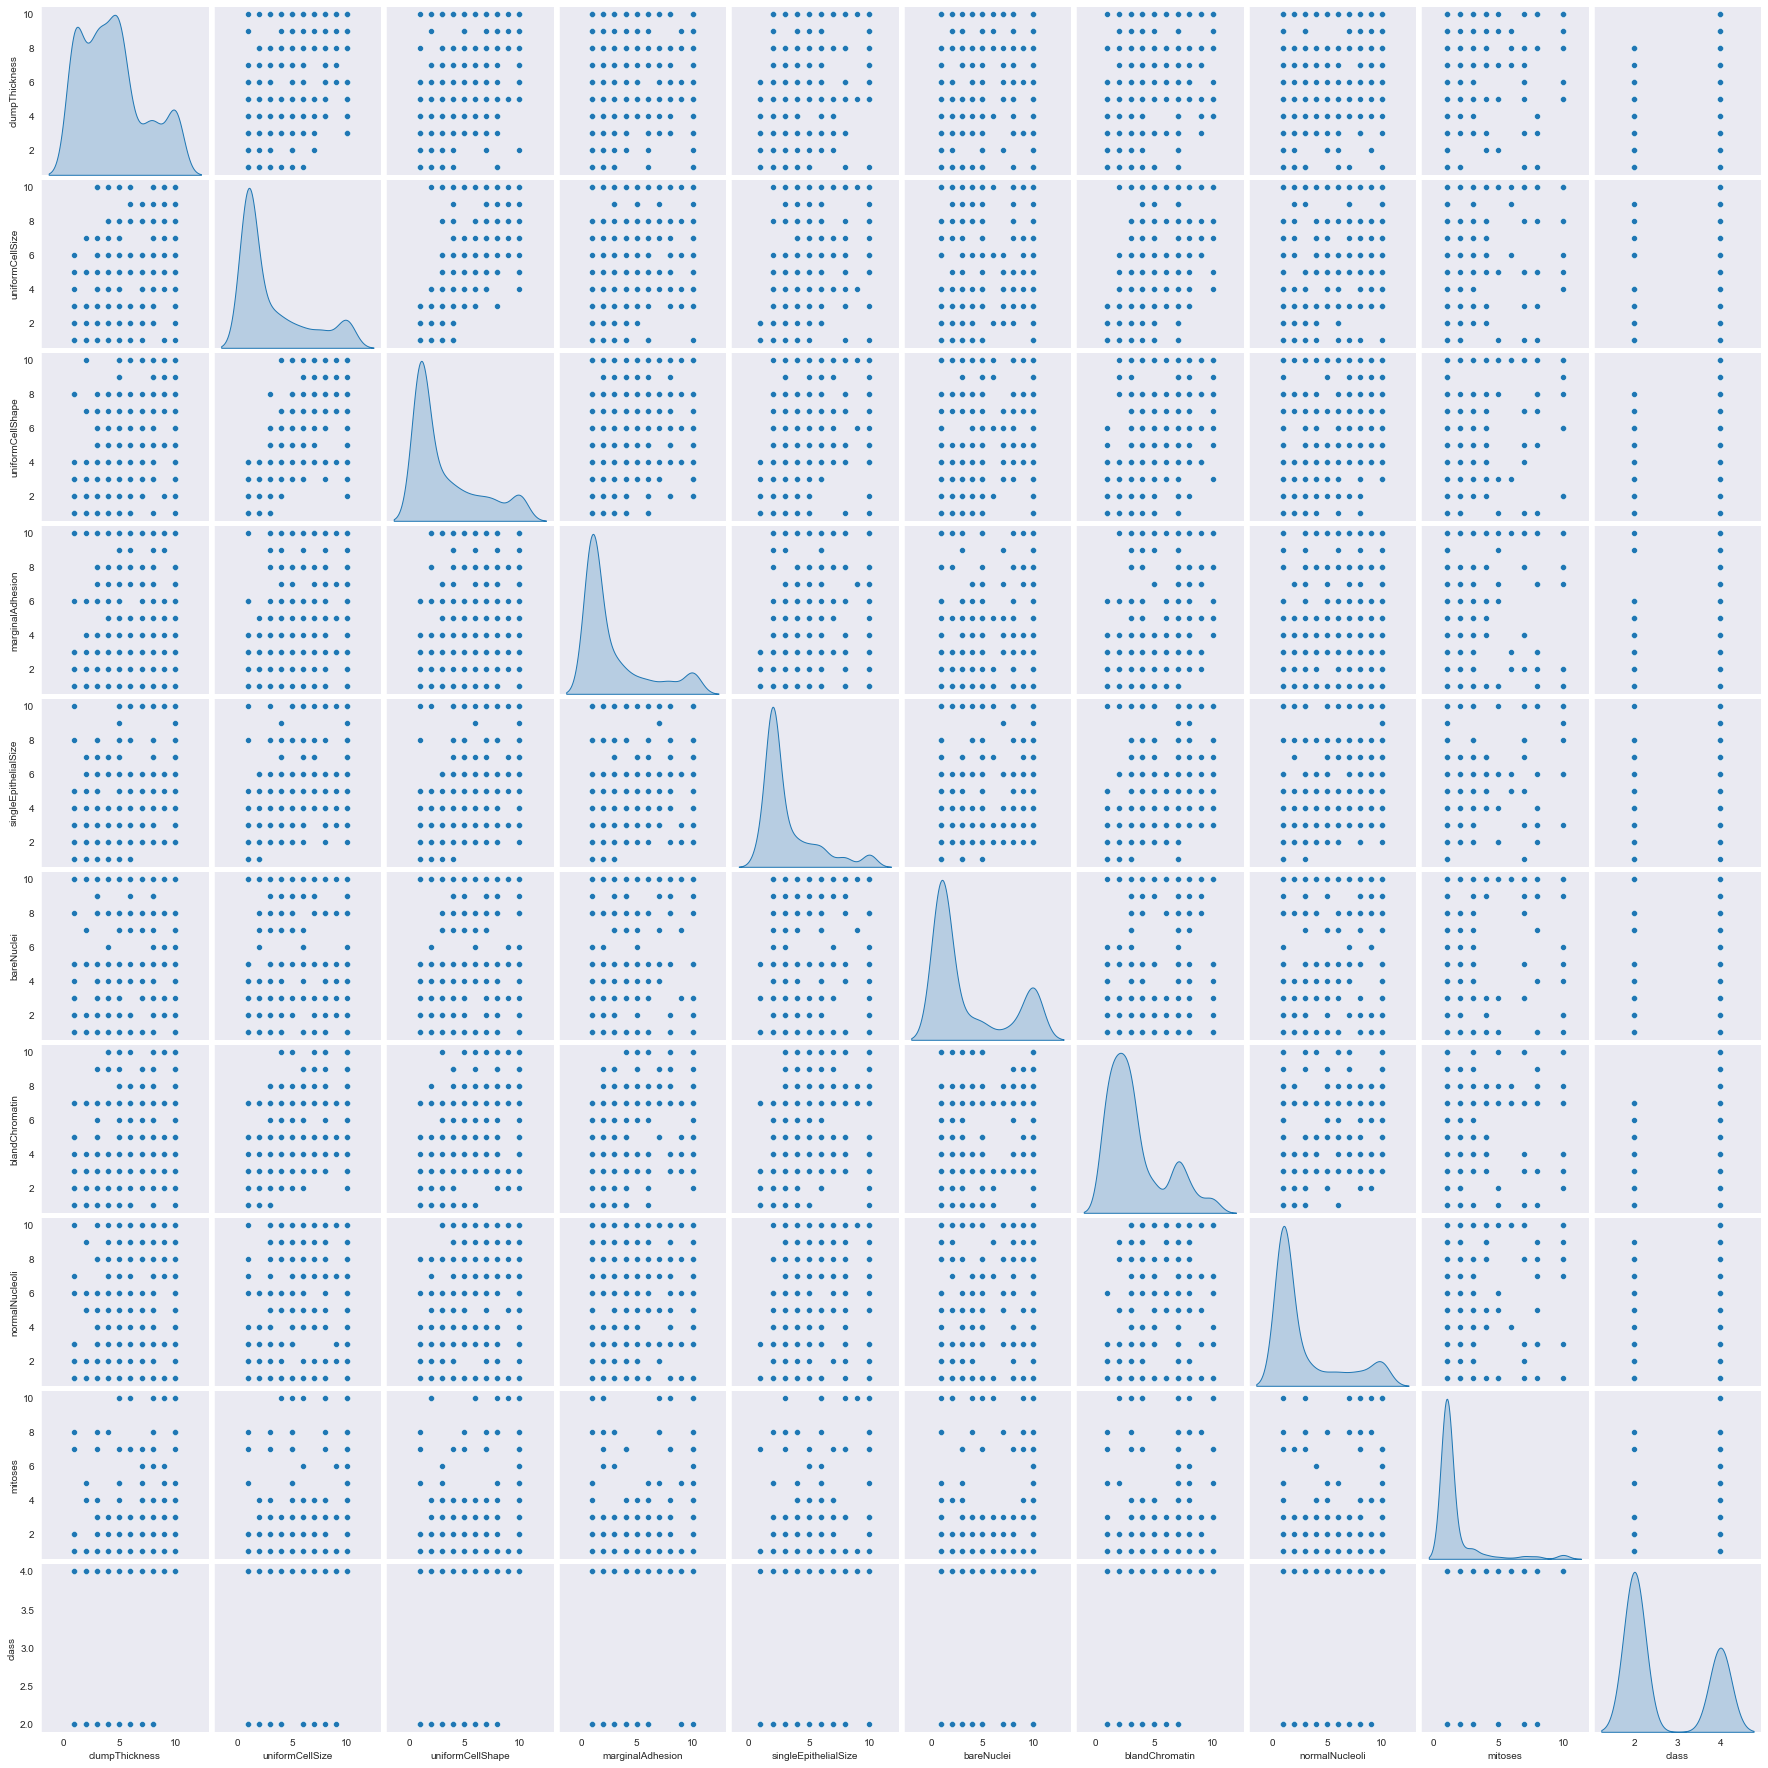

In [50]:
sns.pairplot(bCancerDF,diag_kind='kde')
plt.show()

### Correlation with output
Correlation with output variable

In [51]:
cor_target = abs(coR["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

clumpThickness          0.716001
uniformCellSize         0.817904
uniformCellShape        0.818934
marginalAdhesion        0.696800
singleEpithelialSize    0.682785
bareNuclei              0.807394
blandChromatin          0.756616
normalNucleoli          0.712244
mitoses                 0.423170
class                   1.000000
Name: class, dtype: float64

## Train and Test Model
### Splitting

In [53]:
# Split the data first into predictor and target variable
# Then by train and test sets. 

# everything except 'Class' attribute
X = bCancerDF.drop('class', axis=1).values
Y = bCancerDF['class'].values

# Splitting by 70% for train and 30% for test
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [58]:
# Testing Options
scoring = 'accuracy'

### Model Selection
1. Decision Tree
2. support Vector Machine
3. Gaussian Naive Bayes
4. KNN', K-Nearest Neighbors

In [61]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.954974 (Std accuracy is 0.020103)
For SVM Model:Mean accuracy is 0.971386 (Std accuracy is 0.013512)
For NB Model:Mean accuracy is 0.963223 (Std accuracy is 0.025463)
For KNN Model:Mean accuracy is 0.969345 (Std accuracy is 0.016428)


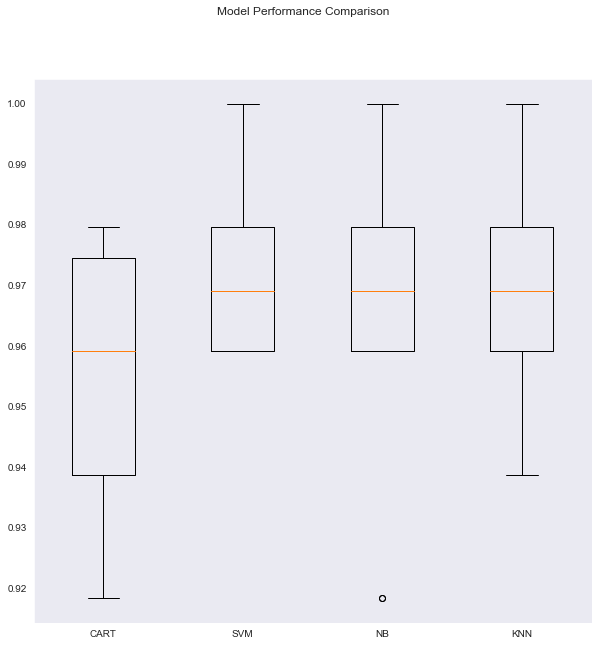

In [64]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Model Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [65]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


Model: CART
Accuracy score: 0.9047619047619048
Classification report:
               precision    recall  f1-score   support

           2       0.90      0.96      0.93       133
           4       0.93      0.81      0.86        77

    accuracy                           0.90       210
   macro avg       0.91      0.88      0.89       210
weighted avg       0.91      0.90      0.90       210


Model: SVM
Accuracy score: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.96      0.96      0.96        77

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210


Model: NB
Accuracy score: 0.9523809523809523
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       133
           4       0.94 

## Support Vector Machine
AS SVC has the highest accuracy score in prediction,
we are selecting it for test score

### Test Accuracy

In [75]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict


Test Accuracy: 0.9714285714285714


array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2], dtype=int64)

#### Example Prediction

In [86]:
example_measures = [[4,2,1,9,1,2,3,2,9]]
prediction = clf.predict(example_measures)
prediction

array([4], dtype=int64)

#### Bengin or Malignant?

In [87]:
if (prediction == 2):
    print('Benign')
else:
    print('Malignant')

Malignant


In [88]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.96      0.96      0.96        77

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

Confusion matrix, without normalization
[[130   3]
 [  3  74]]


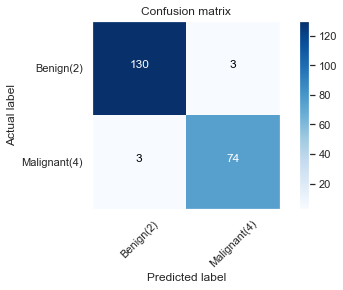

In [92]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')